In [164]:
import numpy as np 
from math import sqrt
import warnings

import matplotlib.pyplot as plt 
from matplotlib import style

from collections import Counter
import random
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing, cross_validation, neighbors

In [165]:
def load_input_data():
    df = pd.read_csv("breastCancer.csv")
    df.replace ("?", -9999, inplace = True)
    df.drop (["id"], 1, inplace = True)
    input_data = df.astype(float).values.tolist()
    random.shuffle(input_data)

    return input_data

We first import the required dataset into the dataframe and drop the attribute "id" as it has no bearing on our algorithm. We also try to replace garbage values with "?". This would be the required preprocessing and data cleansing. 

In [166]:
def KNearestNeighbors(input, reading, kvalue):
    distances = []
    for iterator in input:
        for feature in input[iterator]:
            EuclideanDistance = np.linalg.norm(np.array(feature) - np.array(reading))
            distances.append([EuclideanDistance,iterator])
        votes = [i[1] for i in sorted(distances)[:kvalue]]
        votes_result = Counter(votes).most_common(1)[0][0]
        confidence = Counter(votes).most_common(1)[0][1]/kvalue

    return votes_result, confidence

Now we need to write the predict method which must do the following: it needs to compute the euclidean distance between the “new” observation and all the data points in the training set. It must then select the K nearest ones and perform a majority vote. It then assigns the corresponding label to the observation. Let’s go ahead and write that.

In the above code, we create an array of distances which we sort by increasing order. That way, we can grab the K nearest neighbors (first K distances), get their associated labels which we store in the targets array, and finally perform a majority vote using a Counter and also get the confidence on the vote.

In [167]:
def test_train_KNN(k):
    
    full_data = load_input_data()
    test_size = 0.2
    train_set = {2: [], 4: []}  # Class: (2 for benign, 4 for malignant)
    test_set = {2: [], 4: []}  # Class: (2 for benign, 4 for malignant)
    train_data = full_data[:-int(test_size * len(full_data))]  # 80% of the data
    test_data = full_data[-int(test_size * len(full_data)):]  # 20% of the data

    for entry in train_data:
        train_set[entry[-1]].append(entry[:-1])  
    
    for entry in test_data:
        test_set[entry[-1]].append(entry[:-1])
    
    correct = 0
    total = 0
    for group in test_set:
        for data in test_set[group]:
            vote, confidence = KNearestNeighbors(train_set, data, k)
            if group == vote:
                correct += 1
            total += 1
    
    Accuracy = correct / total
    
    return Accuracy
    

Putting it all together, we can define the function KNearestNeighbor, which loops over every test example and makes a prediction. In the above code, we do the basic test split and after experimentation I found that, 80% train data and 20% test sata to be the ideal split for the same. 

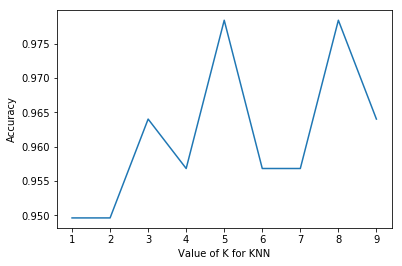

In [171]:
k_range = list(range(1,10))
k_scores = []

for k in k_range:
    k_scores.append(test_train_KNN(k))

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.ticklabel_format(style='plain',axis='x',useOffset=False)
plt.show()

The above graph shows us the the accuracy for different values of K in the range of 1-20 points. 

In [169]:
def scikitlearn_KNN():
    df = pd.read_csv("breastCancer.csv")
    df.replace ("?", -9999, inplace = True)
    df.drop (["id"], 1, inplace = True)
    input_data = df.astype(float).values.tolist()
    random.shuffle(input_data)
    
    X = np.array(df.drop(['class'],1)) #creates features
    y = np.array(df['class']) #creates labels

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train,y_train)

    accuracy = clf.score(X_test,y_test)
    print(accuracy)

In [170]:
scikitlearn_KNN()

0.971428571429
